# Assignment 1

## Introduction

While biological systems are often very complex, in many cases formulas are available to model these formulas in a mathematical way. These equations and systems of equations can be utilized to model the biological system on a computer kin roder to sample multiple configurations quickly.  

## 1 Bacterial Growth

Integrating $\frac{\delta x}{\delta t} = C x$ gives $x_{t} = x_0 \cdot e^{C t}$.
We know that $x_{0} = 10$ and $x_{20} = 20$, therefore: $20 = 10 \cdot e^{C \cdot 20} \Leftrightarrow 2 = e^{C \cdot 20} \Leftrightarrow log(2) = C \cdot 20 \Leftrightarrow C = \frac{ln(2)}{20} \Leftrightarrow C = 0.03466$.

Or more generally $C = \frac{log(2)}{D}$ where D is the doubling time.

To calculate when a certain increase from the original number has occured we can will in a corresponding multiple of the starting value and solve the formula for $t$: $x_{final} = x_0 \cdot e^{C \cdot t} \Leftrightarrow \frac{x_{final}}{x_0} = e^{C \cdot t} \Leftrightarrow ln(\frac{x_{final}}{x_0}) = C \cdot t \Leftrightarrow t = \frac{ln(\frac{x_{final}}{x_0})}{C}$
In the case of $x_{final} = 80$ this gives $t = 60$ and $x_{final} = 100$ results in $t = 66.4386$.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp

c = 0.03465735902
ratio = np.arange(8, 11,2)
for r in ratio:
    print(r)
    print("To get ",  r, "x initial value of 10, t should be:", math.log(r)/c)

8
('To get ', 8, 'x initial value of 10, t should be:', 60.00000001384513)
10
('To get ', 10, 'x initial value of 10, t should be:', 66.4385619130781)


In [2]:
time = np.arange(0,101,5)
x = [10*math.exp(t*0.034657) for t in time]

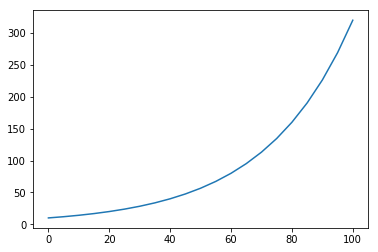

In [3]:
plt.plot(time, x)

## 2

21
21
(1.7025883075218307, 1.4153384424892645, 1.48353323690383)


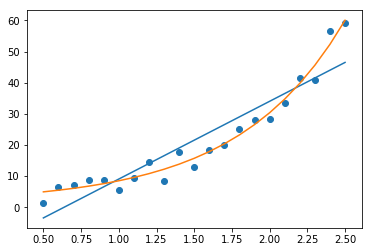

In [6]:
def model_exp(t, A, K, C):
    return A*np.exp(K*t)+C

def fit_exp_nonlin(t, y):
    A = 1
    K = 1
    opt_parms, parm_cov = sp.curve_fit(model_exp, t, y, p0=(A, K, 0))
    A, K, C = opt_parms
    return A, K, C

x_myData = np.arange(0.5, 2.6, 0.1)
y_myData = [1.27,6.58,7.00,8.83,8.66,5.53,9.33,14.57,8.51,17.61,12.94,18.45,19.85,25.03,28.14,28.31,33.41,41.43,40.87,56.71,59.32]
print(len(x_myData))
print(len(y_myData))

plt.scatter(x_myData,y_myData)
m,b = np.polyfit(x_myData, y_myData, 1)
m2,b2 = np.polyfit(np.exp(x_myData), y_myData, 1)

y_linfit = [x*m+b for x in x_myData]

a, k, c = fit_exp_nonlin(x_myData, y_myData)

y_expfit = [model_exp(x,a,k,c) for x in x_myData]

plt.plot(x_myData, y_linfit)
plt.plot(x_myData, y_expfit)

print(a,k,c)

In [5]:
td_l = 0
td_e = 0
for i in range(0,len(y_myData)):
    td_l += np.abs(y_linfit[i]-y_myData[i])
    td_e += np.abs(y_expfit[i]-y_myData[i])
print("The average error of the linear fit it: ", td_l/len(y_myData))
print("The average error of the exponential fit it: ", td_e/len(y_myData))

('The average error of the linear fit it: ', 5.044735930735932)
('The average error of the exponential fit it: ', 2.1644989412175484)


From the figure it can be seen that an exponential function fits the data better.  the differential equation for the fitted function?  How do I derive this?

## 3 The SIR Model - Seasonal Epidemics

In [9]:
%matplotlib inline
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

#import numpy as np
#from scipy import integrate
import math
from matplotlib import pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib.colors import cnames
#from matplotlib import animation


def SIR(mu, beta_0, season_length, gamma, I_0, time):
    delta_t = 0.1
    S = 1-I_0
    I = I_0
    R = 0.0
    S_list = []
    I_list = []
    R_list = []
    time_list = []
    for t in range(int(time/delta_t)):
        S_list.append(S)
        I_list.append(I)
        R_list.append(R)
        time_list.append(t*delta_t)
        S_new = S + (mu - mu * S - beta_0 * (1+ math.sin(2*math.pi*t*delta_t/season_length))*I*S) * delta_t
        I_new = I + (beta_0 * (1+ math.sin(2*math.pi*t*delta_t/season_length))*I*S - (gamma+mu) * I) * delta_t
        R_new = R + (gamma * I - mu * R) * delta_t
        S, I, R = S_new, I_new, R_new
    plt.figure()
    plt.plot(time_list, S_list, "r", label = "S")
    plt.plot(time_list, I_list, "b", label = "I")
    plt.plot(time_list, R_list, "g", label = "R")
    plt.xlabel("Time")
    plt.ylabel("Fraction of population")
    plt.legend(loc = "upper right")
    plt.show()
SIR_interact = interactive(SIR, mu=(0.0, 1.0), beta_0=(0.0, 1.0), 
                           season_length=(0.01, 30.0), gamma=(0.0, 1.0), I_0=(0.01, 1.0), time =(10,110))
display(SIR_interact)


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNSwgZGVzY3JpcHRpb249dSdtdScsIG1heD0xLjApLCBGbG9hdFNsaWRlcih2YWx1ZT0wLjUsIGRlc2NyaXB0aW9uPXXigKY=
